<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timedelta, timezone
import os
import re 

from functools import reduce 
from collections import defaultdict

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'bz_data_analyis.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'sample-sales-data.csv',
 'test.csv',
 'groceries.csv',
 'online_retail_II.xlsx',
 'match_result_test.csv',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'sales.csv',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_vs_discount.csv',
 '1_order_payments_dataset.csv',
 '1_orders_dataset.csv',
 'ecommerce-data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('match_result_test.csv')
df.head()

,match_idx,match_type_id,match_rule_id,p1_member_idx,p2_member_idx,match_first_attack,p1_league_level,p2_league_level,p1_match_score,p2_match_score,match_time,match_result
0,10001,2,2_02,12783,11036,win,2,2,79,47,88,win
1,10002,2,2_05,19479,18315,lose,5,5,43,54,139,lost
2,10003,2,2_10,12800,16571,lose,10,10,32,4,78,win
3,10004,2,2_10,12813,10926,lose,10,10,37,58,52,lost
4,10005,2,2_11,17855,16988,win,11,11,52,41,48,win


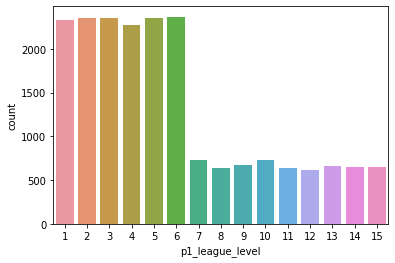

In [5]:
sns.countplot(data = df, x = 'p1_league_level')

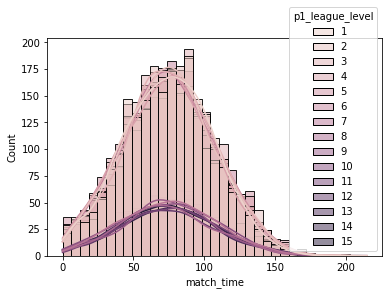

In [7]:
sns.histplot(data = df, x = 'match_time', hue = 'p1_league_level', kde = True, bins = 35)

In [8]:
df = pd.read_csv('sales_data_with_stores.csv')
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales
0,Violet,PG2,4187,498,420.76,569.91,13,58
1,Rose,PG2,4195,473,545.64,712.41,16,58
2,Violet,PG2,4204,968,640.42,854.91,22,88
3,Daisy,PG2,4219,241,869.69,1034.55,14,45
4,Daisy,PG2,4718,1401,12.54,26.59,50,285


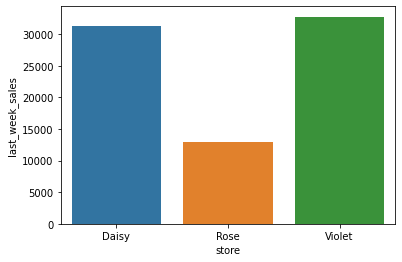

In [10]:
sns.barplot(data = df.groupby(['store'])['last_week_sales'].sum().reset_index(),
            x = 'store', y = 'last_week_sales'
            )

In [15]:
cnt = pd.melt(df[['store', 'last_week_sales','last_month_sales']], id_vars = 'store').groupby(['store','variable'])['value'].sum().reset_index()
cnt.head()

,store,variable,value
0,Daisy,last_month_sales,115527
1,Daisy,last_week_sales,31276
2,Rose,last_month_sales,47355
3,Rose,last_week_sales,12904
4,Violet,last_month_sales,119118


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.


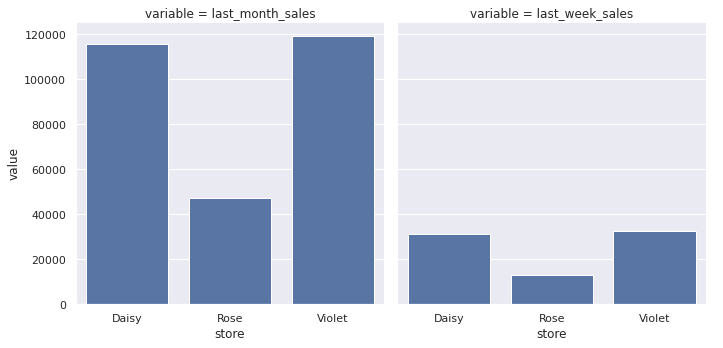

In [31]:
sns.set(color_codes = True)
facet = sns.FacetGrid(data = cnt.assign(wow = cnt['store']), col = 'variable',size = 5)
facet = facet.map(sns.barplot, 'store', 'value')
facet = facet.add_legend()

In [35]:
df = pd.read_csv('groceries.csv')
df['sales_date'] = df['sales_date'].to_numpy().astype('datetime64[D]')
df['rev'] = df.price * df.sales_quantity
df.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,rev
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,107.64
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,68.77
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,101.66
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,68.77
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,101.66


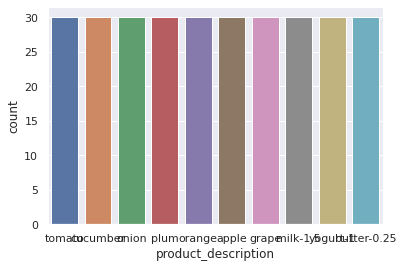

In [37]:
sns.countplot(data = df, x = 'product_description')

In [47]:
cnt = pd.melt(df.groupby(['product_description'])['price','sales_quantity','rev'].sum().reset_index(),
        id_vars = 'product_description')
cnt.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,product_description,variable,value
0,apple,price,56.10
1,butter-0.25,price,319.20
2,cucumber,price,126.92
3,grape,price,132.00
4,milk-1.5,price,170.20


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.


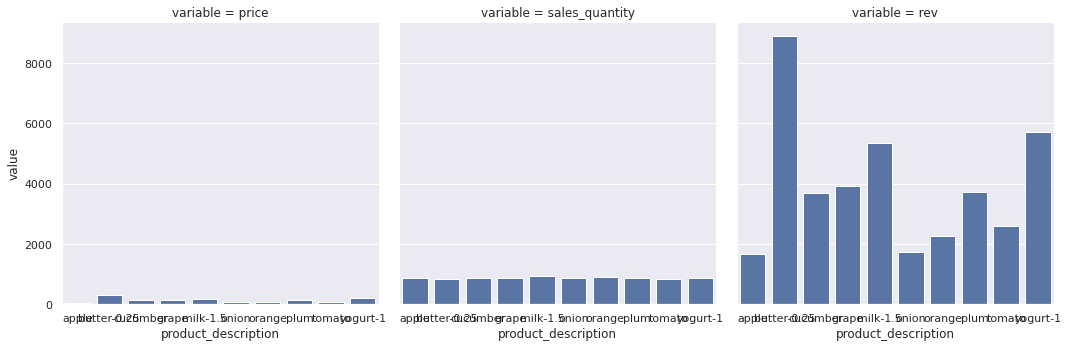

In [48]:
facet = sns.FacetGrid(data = cnt, col = 'variable', size = 5)
facet.map(sns.barplot, 'product_description', 'value')

In [55]:
cnt = df.groupby(['product_description', 'sales_date'])['rev'].sum().reset_index()
cnt.head()

,product_description,sales_date,rev
0,apple,2021-11-01,58.9
1,apple,2021-11-02,55.1
2,apple,2021-11-03,58.9
3,apple,2021-11-04,58.9
4,apple,2021-11-05,0.0


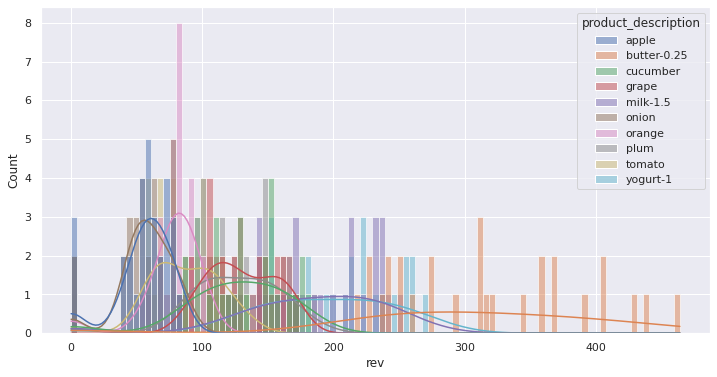

In [58]:
plt.figure(figsize = (12,6))
sns.histplot(data = cnt, x = 'rev', hue = 'product_description', kde = True, bins = 99)

# Iterators

In [59]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [61]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [63]:
a = (a for a in range(100))
a

<generator object <genexpr> at 0x7f94f75a0b50>

In [64]:
for _ in range(10) :
  print(next(a))

0
1
2
3
4
5
6
7
8
9


In [65]:
for _ in range(10) :
  print(next(a))

10
11
12
13
14
15
16
17
18
19
